<a href="https://colab.research.google.com/github/FalineRezvani/NoviceCoding/blob/main/MLPClassification_CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# April 9, 2024
#
# This code will utilize existing customer data to predict credit risk of future applicants.
# Developer: Faline Rezvani
#
# German Credit Data
# This dataset records a set of attributes, along with the credit classification, good or bad, of a sample of people.
# This dataset can be found on OpenML https://www.openml.org/d/31

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

creditg = fetch_openml(name='credit-g',  as_frame=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(creditg.frame.columns)

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [ ]:
print(creditg.frame.describe())

          duration  credit_amount  installment_commitment  residence_since  \
count  1000.000000    1000.000000             1000.000000      1000.000000   
mean     20.903000    3271.258000                2.973000         2.845000   
std      12.058814    2822.736876                1.118715         1.103718   
min       4.000000     250.000000                1.000000         1.000000   
25%      12.000000    1365.500000                2.000000         2.000000   
50%      18.000000    2319.500000                3.000000         3.000000   
75%      24.000000    3972.250000                4.000000         4.000000   
max      72.000000   18424.000000                4.000000         4.000000   

               age  existing_credits  num_dependents  
count  1000.000000       1000.000000     1000.000000  
mean     35.546000          1.407000        1.155000  
std      11.375469          0.577654        0.362086  
min      19.000000          1.000000        1.000000  
25%      27.000000    

In [ ]:
print(creditg.details)

{'id': '31', 'name': 'credit-g', 'version': '1', 'description_version': '13', 'format': 'ARFF', 'creator': 'Dr. Hans Hofmann', 'collection_date': '1994-11-17', 'upload_date': '2014-04-06T23:21:47', 'language': 'English', 'licence': 'Public', 'url': 'https://api.openml.org/data/v1/download/31/credit-g.arff', 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0031/dataset_31.pq', 'file_id': '31', 'default_target_attribute': 'class', 'version_label': '1', 'citation': 'https://archive.ics.uci.edu/ml/citation_policy.html', 'tag': ['credit_scoring', 'Economics', 'finance_problem', 'Human Activities', 'mythbusting_1', 'OpenML-CC18', 'OpenML100', 'study_1', 'study_123', 'study_14', 'study_144', 'study_15', 'study_20', 'study_218', 'study_241', 'study_34', 'study_37', 'study_41', 'study_50', 'study_52', 'study_7', 'study_70', 'study_98', 'study_99', 'uci'], 'visibility': 'public', 'original_data_url': 'https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)', 'paper_url': 'ht

In [ ]:
creditg.frame.shape

(1000, 21)

In [ ]:
creditg.frame

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


#**EDA Numerical Features**

# Duration

In [ ]:
creditg.frame['duration']

0       6.0
1      48.0
2      12.0
3      42.0
4      24.0
       ... 
995    12.0
996    30.0
997    12.0
998    45.0
999    45.0
Name: duration, Length: 1000, dtype: float64

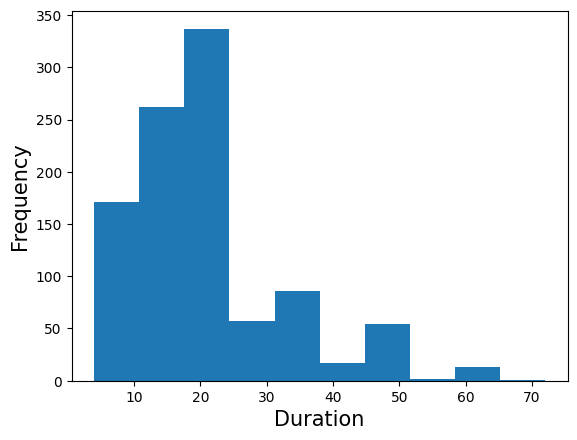

In [ ]:
# Histogram to show distribution
creditg.frame['duration'].plot(kind='hist')
plt.xlabel('Duration', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

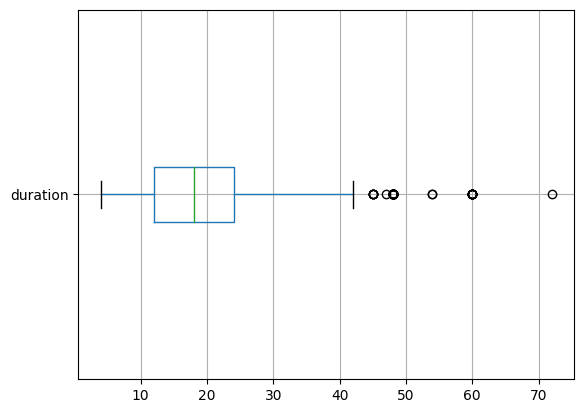

In [ ]:
# Boxplot to show distribution
creditg.frame.boxplot(column='duration', vert=False)
plt.show()

# Credit Amount

In [ ]:
creditg.frame['credit_amount']

0      1169.0
1      5951.0
2      2096.0
3      7882.0
4      4870.0
        ...  
995    1736.0
996    3857.0
997     804.0
998    1845.0
999    4576.0
Name: credit_amount, Length: 1000, dtype: float64

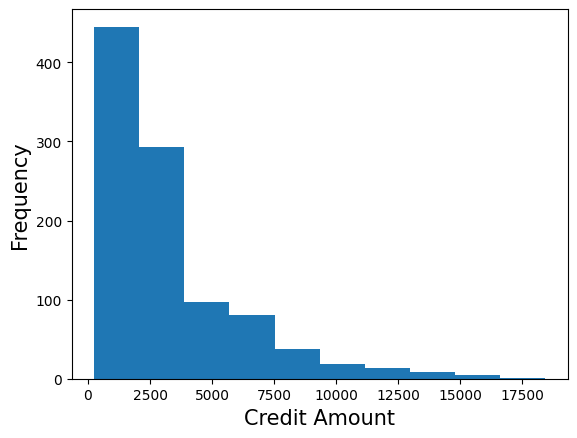

In [ ]:
# Histogram to show distribution
creditg.frame['credit_amount'].plot(kind='hist')
plt.xlabel('Credit Amount', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

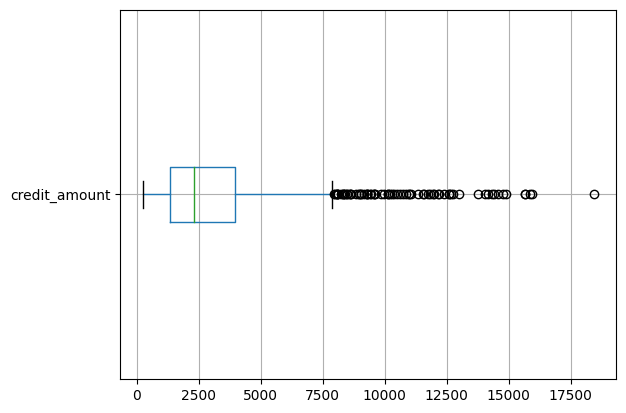

In [ ]:
# Boxplot to show distribution
creditg.frame.boxplot(column='credit_amount', vert=False)
plt.show()

# Residence Since

In [ ]:
creditg.frame['residence_since']

0      4.0
1      2.0
2      3.0
3      4.0
4      4.0
      ... 
995    4.0
996    4.0
997    4.0
998    4.0
999    4.0
Name: residence_since, Length: 1000, dtype: float64

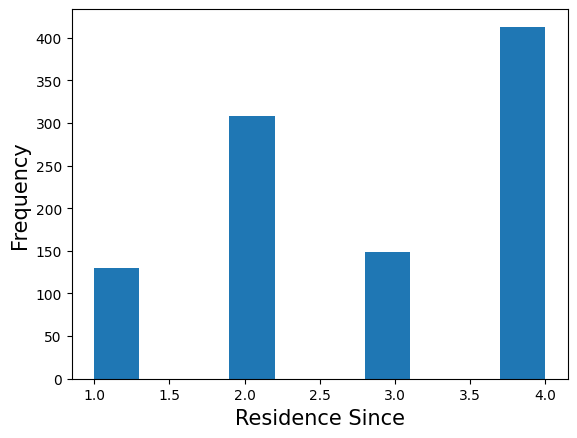

In [ ]:
# Histogram to show distribution
creditg.frame['residence_since'].plot(kind='hist')
plt.xlabel('Residence Since', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()# Boxplot to show distribution

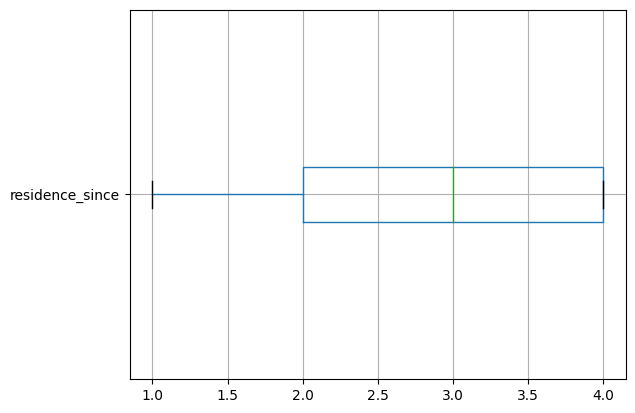

In [ ]:
creditg.frame.boxplot(column='residence_since', vert=False)
plt.show()

# Age

In [ ]:
creditg.frame['age']

0      67.0
1      22.0
2      49.0
3      45.0
4      53.0
       ... 
995    31.0
996    40.0
997    38.0
998    23.0
999    27.0
Name: age, Length: 1000, dtype: float64

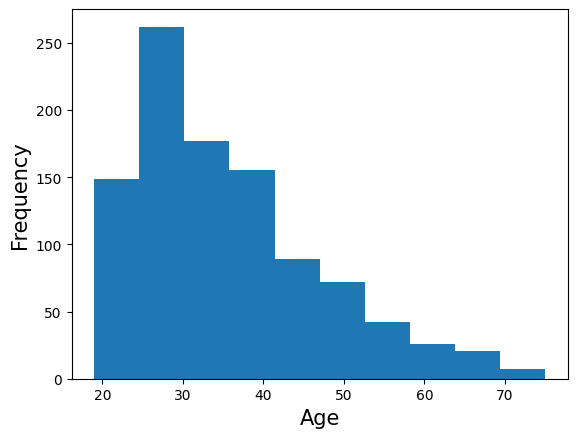

In [ ]:
# Histogram to show distribution
creditg.frame['age'].plot(kind='hist')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

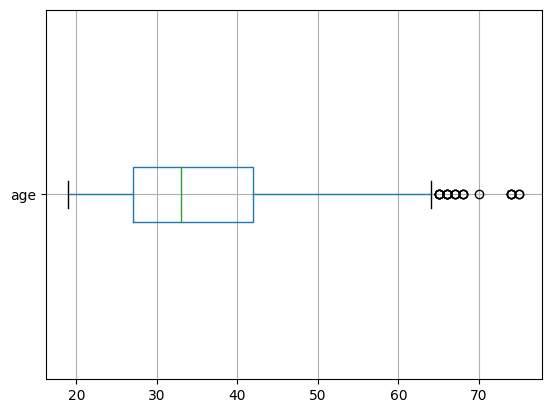

In [ ]:
creditg.frame.boxplot(column='age', vert=False)
plt.show()

# Existing Credits

In [ ]:
creditg.frame['existing_credits']

0      2.0
1      1.0
2      1.0
3      1.0
4      2.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: existing_credits, Length: 1000, dtype: float64

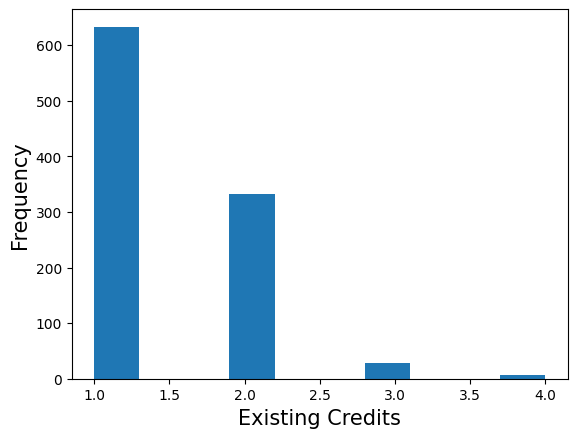

In [ ]:
# Histogram to show distribution
creditg.frame['existing_credits'].plot(kind='hist')
plt.xlabel('Existing Credits', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

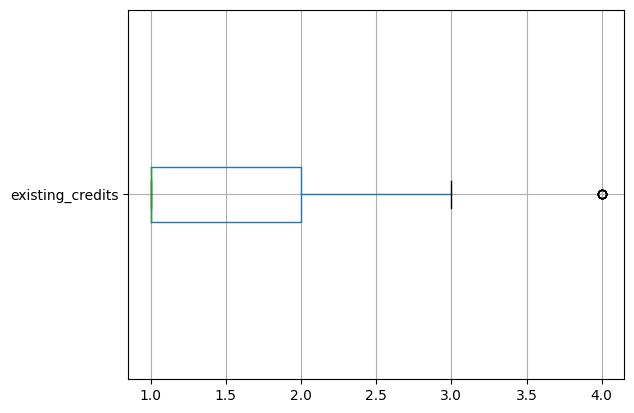

In [ ]:
creditg.frame.boxplot(column='existing_credits', vert=False)
plt.show()

# Installment Commitment

In [ ]:
creditg.frame['installment_commitment']

0      4.0
1      2.0
2      2.0
3      2.0
4      3.0
      ... 
995    3.0
996    4.0
997    4.0
998    4.0
999    3.0
Name: installment_commitment, Length: 1000, dtype: float64

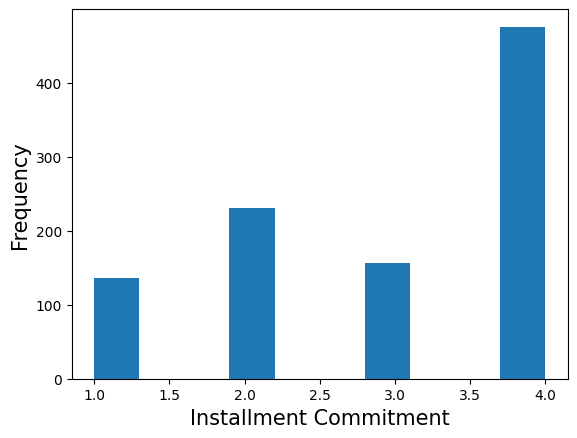

In [ ]:
# Histogram to show distribution
creditg.frame['installment_commitment'].plot(kind='hist')
plt.xlabel('Installment Commitment', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

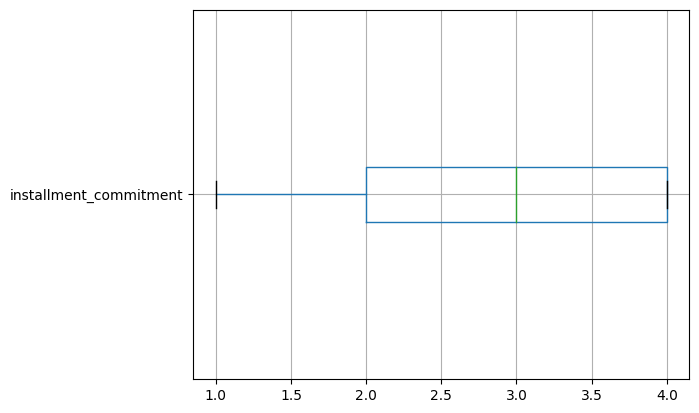

In [ ]:
creditg.frame.boxplot(column='installment_commitment', vert=False)
plt.show()

# Num Dependents

In [ ]:
creditg.frame['num_dependents']

0      1.0
1      1.0
2      2.0
3      2.0
4      2.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: num_dependents, Length: 1000, dtype: float64

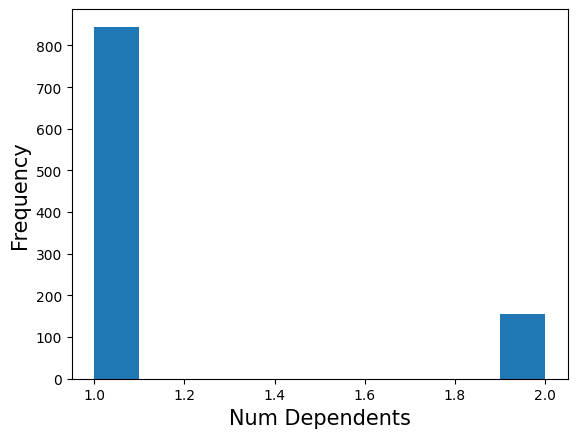

In [ ]:
# Histogram to show distribution
creditg.frame['num_dependents'].plot(kind='hist')
plt.xlabel('Num Dependents', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

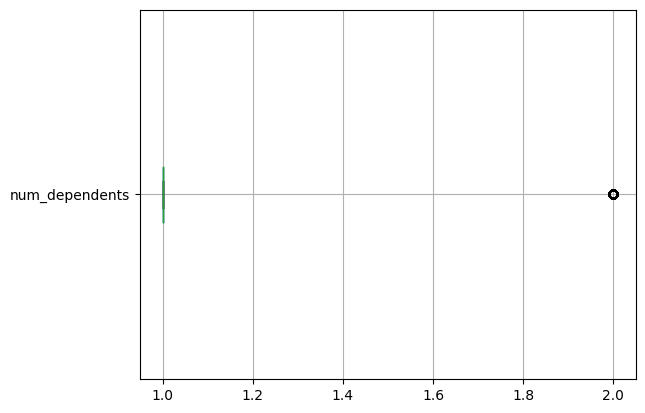

In [ ]:
creditg.frame.boxplot(column='num_dependents', vert=False)
plt.show()

#**Encoding Nominal Categorical Features Using OneHotEncoder**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Create instance of OneHotEncoder
ohe = OneHotEncoder(sparse = False)

# Checking Status

In [ ]:
# Apply and update 'checking_status' column
creditg.frame['checking_status'] = ohe.fit_transform(creditg.frame[['checking_status']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Purpose

In [ ]:
# Apply and update 'purpose' column
creditg.frame['purpose'] = ohe.fit_transform(creditg.frame[['purpose']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Savings Status

In [ ]:
# Apply and update 'savings_status' column
creditg.frame['savings_status'] = ohe.fit_transform(creditg.frame[['savings_status']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Personal Status

In [ ]:
# Apply and update 'personal_status' column
creditg.frame['personal_status'] = ohe.fit_transform(creditg.frame[['personal_status']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Other Parties

In [ ]:
# Apply and update 'other_parties' column
creditg.frame['other_parties'] = ohe.fit_transform(creditg.frame[['other_parties']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Property Magnitude

In [ ]:
# Apply and update 'property_magnitude' column
creditg.frame['property_magnitude'] = ohe.fit_transform(creditg.frame[['property_magnitude']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Other Payment Plans

In [ ]:
# Apply and update 'other_payment_plans' column
creditg.frame['other_payment_plans'] = ohe.fit_transform(creditg.frame[['other_payment_plans']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Housing

In [ ]:
# Apply and update 'housing' column
creditg.frame['housing'] = ohe.fit_transform(creditg.frame[['housing']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Telephone

In [ ]:
# Apply and update 'own_telephone' column
creditg.frame['own_telephone'] = ohe.fit_transform(creditg.frame[['own_telephone']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Foreign Worker

In [ ]:
# Apply and update 'foreign_worker' column
creditg.frame['foreign_worker'] = ohe.fit_transform(creditg.frame[['foreign_worker']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# **Encoding Ordinal Categorial Features Using OrdinalEncoder**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
# Create instance of ordinal encoder
oe = OrdinalEncoder()

# Credit History

In [ ]:
# Apply and update 'credit_history' column
creditg.frame['credit_history'] = oe.fit_transform(creditg.frame[['credit_history']])

# Employment

In [ ]:
# Apply and update 'employment' column
creditg.frame['employment'] = oe.fit_transform(creditg.frame[['employment']])

# Job

In [ ]:
# Apply and update 'job' column
creditg.frame['job'] = oe.fit_transform(creditg.frame[['job']])

# **Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Create instance of label encoder
le = LabelEncoder()

In [ ]:
# Fit to target variable, 'class' (label)
creditg.frame['class'] = le.fit_transform(creditg.frame[['class']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Checking that we only have two classes
le.classes_

array(['bad', 'good'], dtype=object)

In [ ]:
# Count of the instances of our dependent (target) variable, 'class'.
# 1 - good, 0 - bad
creditg.frame['class'].value_counts()

class
1    700
0    300
Name: count, dtype: int64

# Shuffle Dataset

In [ ]:
from sklearn.utils import shuffle

In [ ]:
creditg.frame = shuffle(creditg.frame)

# Updated Dataset

In [ ]:
# Check dataframe
creditg.frame.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
292,0.0,24.0,1.0,0.0,6419.0,0.0,3.0,2.0,1.0,0.0,...,0.0,44.0,0.0,1.0,2.0,0.0,2.0,0.0,0.0,1
453,0.0,24.0,3.0,0.0,2670.0,0.0,3.0,4.0,0.0,0.0,...,1.0,35.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
710,0.0,18.0,1.0,0.0,629.0,0.0,3.0,4.0,0.0,0.0,...,0.0,32.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1
355,1.0,24.0,3.0,0.0,1246.0,0.0,2.0,4.0,0.0,0.0,...,0.0,23.0,0.0,0.0,1.0,3.0,1.0,1.0,0.0,0
884,1.0,24.0,3.0,0.0,4057.0,0.0,1.0,3.0,0.0,0.0,...,1.0,43.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0


#Isolating X and y; test/train split

In [ ]:
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Assigning Target Variable
target_column = ['class']

In [ ]:
# Create list of predictor variables
predictors = list(set(list(creditg.frame.columns))-set(target_column))

In [ ]:
# Standardizing predictors by dividing by max
creditg.frame[predictors] = creditg.frame[predictors]/creditg.frame[predictors].max()

In [ ]:
# Summary statistics for the dataframe
creditg.frame.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
checking_status,1000.0,0.269000,0.443662,0.000000,0.000000,0.000000,1.000000,1.0
duration,1000.0,0.290319,0.167484,0.055556,0.166667,0.250000,0.333333,1.0
credit_history,1000.0,0.554750,0.266009,0.000000,0.250000,0.750000,0.750000,1.0
purpose,1000.0,0.097000,0.296106,0.000000,0.000000,0.000000,0.000000,1.0
credit_amount,1000.0,0.177554,0.153210,0.013569,0.074115,0.125896,0.215602,1.0
savings_status,1000.0,0.103000,0.304111,0.000000,0.000000,0.000000,0.000000,1.0
employment,1000.0,0.381250,0.336079,0.000000,0.000000,0.250000,0.750000,1.0
installment_commitment,1000.0,0.743250,0.279679,0.250000,0.500000,0.750000,1.000000,1.0
personal_status,1000.0,0.310000,0.462725,0.000000,0.000000,0.000000,1.000000,1.0
other_parties,1000.0,0.041000,0.198389,0.000000,0.000000,0.000000,0.000000,1.0


In [ ]:
# Removing NA's
creditg.frame = creditg.frame.dropna()

In [ ]:
# Transforming predictor data using principal componenet analysis (PCA) for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(creditg.frame[predictors])

In [ ]:
# Splitting our dataset into dependent variable, y and independent variables, X
#X = creditg.frame[predictors].values
y = creditg.frame[target_column].values

In [ ]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape); print(X_test.shape)

(750, 20)
(250, 20)


#**Building MLP Model**

In [ ]:
# Importing multi-layer-perceptron (MLP) library
from sklearn.neural_network import MLPClassifier

# Creating instance of model
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='sgd',
                    learning_rate='constant', learning_rate_init=0.01, max_iter=1000)

# Training the model
mlp.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000,
              solver='sgd')

In [ ]:
# Predictions on training set
predict_train = mlp.predict(X_train)
# Predictions on test set
predict_test = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

print('Training accuracy')
# Confusion matrix for training set
print(confusion_matrix(y_train,predict_train))

Training accuracy
[[131  96]
 [ 29 494]]


In [ ]:
# Classification report for training set
print(classification_report(y_train,predict_train))

              precision    recall  f1-score   support

           0       0.82      0.58      0.68       227
           1       0.84      0.94      0.89       523

    accuracy                           0.83       750
   macro avg       0.83      0.76      0.78       750
weighted avg       0.83      0.83      0.82       750



In [ ]:
print('Testing accuracy')
# Confusion matrix for test set
print(confusion_matrix(y_test,predict_test))

Testing accuracy
[[ 27  46]
 [ 28 149]]


In [ ]:
# Classification report for test set
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           0       0.49      0.37      0.42        73
           1       0.76      0.84      0.80       177

    accuracy                           0.70       250
   macro avg       0.63      0.61      0.61       250
weighted avg       0.68      0.70      0.69       250



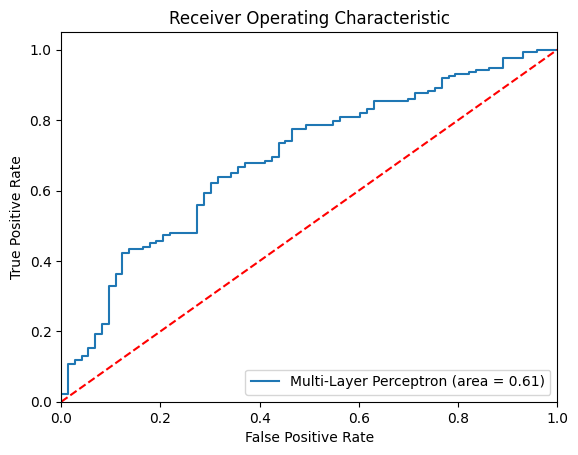

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
mlp_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'Multi-Layer Perceptron (area = %0.2f)' % mlp_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.savefig('ROC_CreditRisk')
plt.show()